In [19]:
import pandas as pd
import numpy
import mglearn
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.datasets import make_moons, load_breast_cancer
from sklearn.linear_model import LogisticRegression

## 앙상블 2

#### 배깅

- Bootstrap aggregating의 줄임말.
- 중복을 허용한 랜덤 샘플링으로 만든 훈련 세트를 이용하여 분류기를 각기 다르게 학습


In [2]:
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=25)
Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xm, ym, random_state=42, stratify=ym)

cancer = load_breast_cancer()
Xc_train, Xc_test, yc_train, yc_test = train_test_split(cancer.data, cancer.target, random_state=42)

In [3]:
bagging = BaggingClassifier(LogisticRegression(), n_estimators=100,
                            oob_score=True, n_jobs=-1, random_state=42)
bagging.fit(Xc_train, yc_train)

BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=100,
                  n_jobs=-1, oob_score=True, random_state=42)

In [5]:
print(f'훈련 세트 정확도{bagging.score(Xc_train, yc_train)}')
print(f'테스트 세트 정확도{bagging.score(Xc_test, yc_test)}')
print(f'oob 세트 정확도{bagging.oob_score_}')

훈련 세트 정확도0.9436619718309859
테스트 세트 정확도0.972027972027972
oob 세트 정확도0.9389671361502347


- oob_score를 True로 지정하면 매개변수는 부트스트래핑에 포함되지 않은 샘플을 기반으로 훈련된 모델을 평가 (OOB 오차)
- oob_score 값을 통해 테스트 세트의 성능을 짐작 가능, RandomForestClassifier도 지원

In [6]:
from sklearn.tree import DecisionTreeClassifier

bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=5, n_jobs=-1, random_state=42)
bagging.fit(Xm_train, ym_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=5,
                  n_jobs=-1, random_state=42)

c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48176 (\N{HANGUL SYLLABLE BAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44613 (\N{HANGUL SYLLABLE GING}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


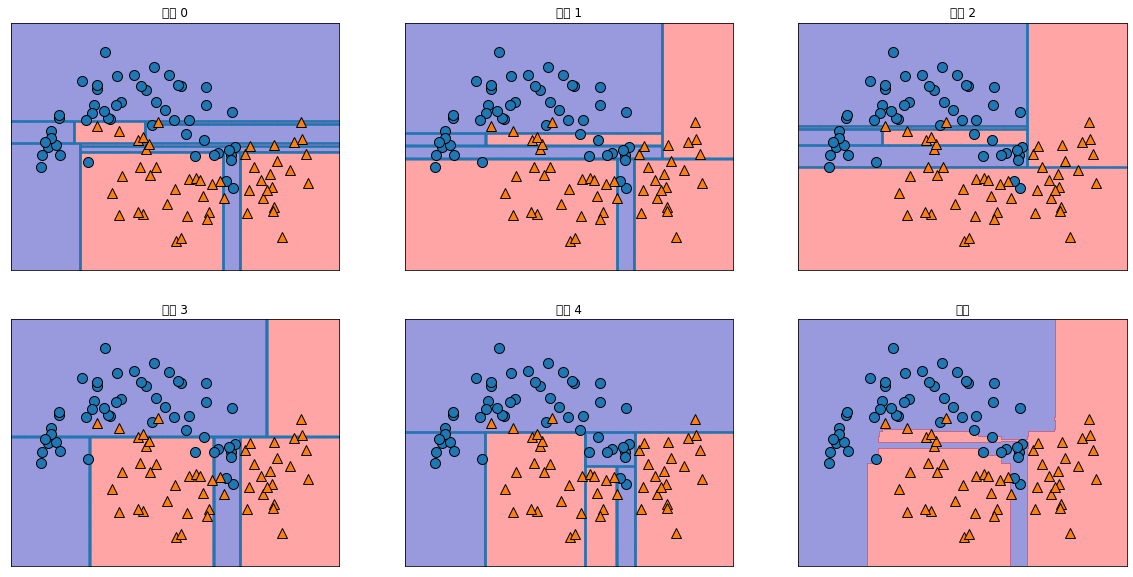

In [8]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), bagging.estimators_)):
    ax.set_title(f'트리 {i}')
    mglearn.plots.plot_tree_partition(Xm, ym, tree, ax=ax)

mglearn.plots.plot_2d_separator(bagging, Xm, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title('배깅')
mglearn.discrete_scatter(Xm[:, 0], Xm[:, 1], ym)
plt.show()

- 랜덤포레스트의 결과와 매우 비슷한 것을 알 수 있다.

In [10]:
bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, oob_score=True, n_jobs=-1, random_state=42)
bagging.fit(Xc_train, yc_train)

print(f'훈련 세트 정확도{bagging.score(Xc_train, yc_train)}')
print(f'테스트 세트 정확도{bagging.score(Xc_test, yc_test)}')
print(f'oob 세트 정확도{bagging.oob_score_}')

훈련 세트 정확도1.0
테스트 세트 정확도0.958041958041958
oob 세트 정확도0.9553990610328639


- 배깅은 랜덤 포레스트와 달리 max_samples 매개변수에서 부트스트랩 샘플의 크기를 지정할 수 있다.
- 또한 랜덤 포레스트는 DecisionTreeClassifier(splitter='best')로 고정되어 있는데
- 결정트리를 splitter='random'으로 설정하면 무작위로 분할한 후보 노드 중에서 최선의 분할을 찾는다.

#### 엑스트라 트리

- 랜덤 포레스트와 비슷하지만 후보 특성을 무작위로 분할한 다음 최적의 분할을 찾는다.
-  DecisionTreeClassifier(splitter='random')을 사용하고 부트스트랩 샘플링은 적용하지 않는다.
- 엑스트라 트리와 랜덤 포레스트는 다른 방식으로 모델에 무작위성을 주입한다고 볼 수 있다.

c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50641 (\N{HANGUL SYLLABLE EG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46972 (\N{HANGUL SYLLABLE RA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


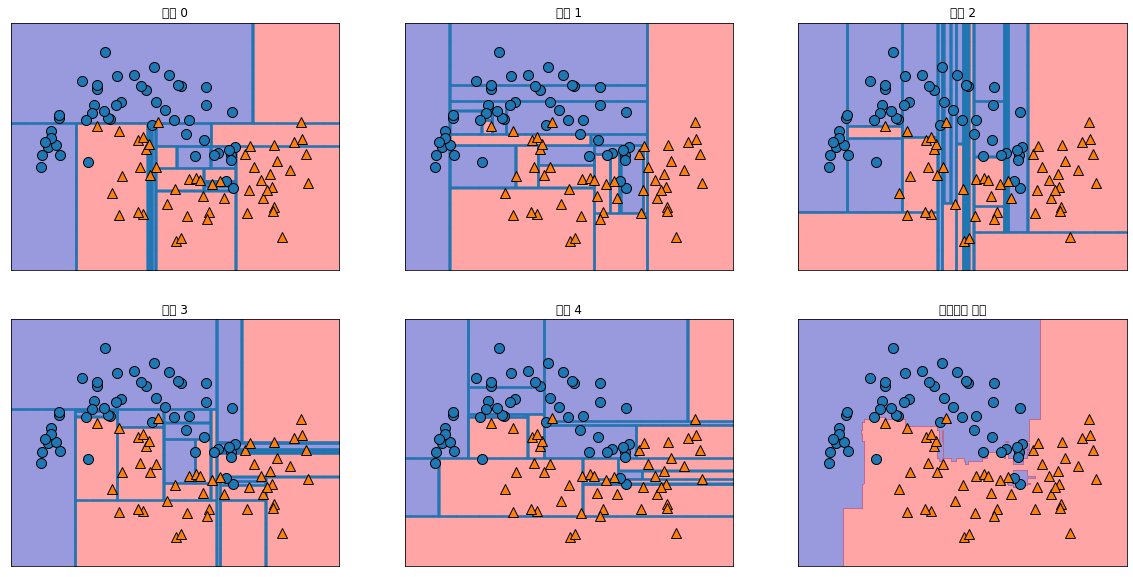

In [13]:
xtree = ExtraTreesClassifier(n_estimators=5, random_state=42, n_jobs=-1)
xtree.fit(Xm_train, ym_train)

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), xtree.estimators_)):
    ax.set_title(f'트리 {i}')
    mglearn.plots.plot_tree_partition(Xm, ym, tree, ax=ax)

mglearn.plots.plot_2d_separator(xtree, Xm, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title('엑스트라 트리')
mglearn.discrete_scatter(Xm[:, 0], Xm[:, 1], ym)
plt.show()

In [16]:
xtree = ExtraTreesClassifier(n_estimators=100, n_jobs=-1, random_state=42)
xtree.fit(Xc_train, yc_train)

print(f'훈련 세트 정확도{xtree.score(Xc_train, yc_train)}')
print(f'테스트 세트 정확도{xtree.score(Xc_test, yc_test)}')


훈련 세트 정확도1.0
테스트 세트 정확도0.9790209790209791


- 엑스트라 트리는 랜덤 포레스트와 거의 같은 성능을 낸다.
- 랜덤 포레스트보다 계산 비용이 적지만 무작위 분할 때문에 일반화 성능을 높이려면 종종 많은 트리를 만들어야 한다.
- 일반적으로 랜덤 포레스트가 더 선호되는 이유이다.

c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


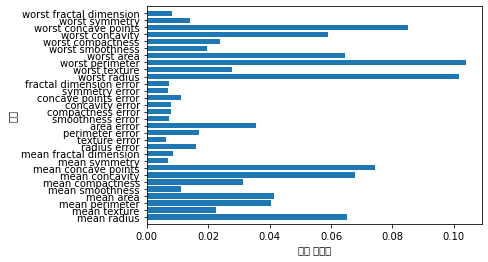

In [18]:
n_features = cancer.data.shape[1]
plt.barh(range(n_features), xtree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel('특성 중요도')
plt.ylabel('특성')
plt.ylim(-1, n_features)
plt.show()

####  에이다 부스트
- Adaptive Boosting의 줄임말로 그레이디언트 부스팅처럼 약한 학습기를 사용
- 그레이디언트 부스팅과 달리 이전 모델이 잘못 분류한 샘플에 가중치를 부여해 다음 모델 훈련
- 훈련된 각 모델은 성능에 따라 가중치가 부여된다.
- 예측을 만들 때는 모델이 예측한 레이블을 기준으로 모델의 가중치를 합산하여 가장 높은 값을 가진 레이블을 선택한다.
- 기본적으로 DecisionTree를 사용하지만 base_estimator 매개변수에서 다른 모델을 지정할 수 있다.

c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50641 (\N{HANGUL SYLLABLE EG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46972 (\N{HANGUL SYLLABLE RA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


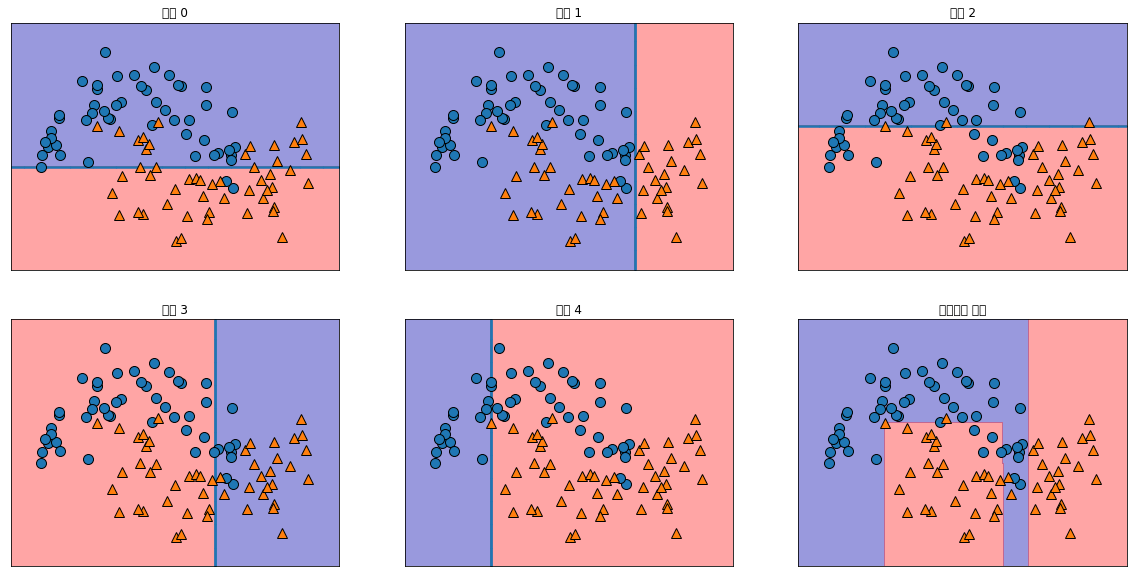

In [21]:
ada = AdaBoostClassifier(n_estimators=5, random_state=42)
ada.fit(Xm_train, ym_train)

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), ada.estimators_)):
    ax.set_title(f'트리 {i}')
    mglearn.plots.plot_tree_partition(Xm, ym, tree, ax=ax)

mglearn.plots.plot_2d_separator(ada, Xm, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title('엑스트라 트리')
mglearn.discrete_scatter(Xm[:, 0], Xm[:, 1], ym)
plt.show()

- 깊이가 1인 결정 트리를 사용하기 때문에 각 트리의 결정 경계가 직선 하나이다.

In [23]:
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(Xc_train, yc_train)

print(f'훈련 세트 정확도{ada.score(Xc_train, yc_train)}')
print(f'테스트 세트 정확도{ada.score(Xc_test, yc_test)}')

훈련 세트 정확도1.0
테스트 세트 정확도0.9440559440559441


c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


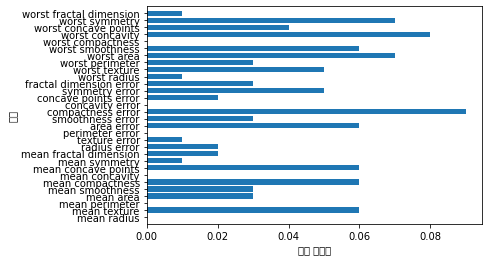

In [24]:
plt.barh(range(n_features), ada.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel('특성 중요도')
plt.ylabel('특성')
plt.ylim(-1, n_features)
plt.show()

- 아주 얕은 트리를 앙상블했기 때문에 일반화 성능이 조금 더 향상되었다.
- 특성 중요도에서는 다른 모델에선 부각되지 않았던 area error 특성을 크게 강조하고 있는 것을 알 수 있다.